Stephanie Rivera

Time series analysis on the Kaggle dataset "Trending YouTube Video Statistics"

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
usa_trending = pd.read_csv("youtube-new/USvideos.csv")


In [3]:
usa_trending.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
#keep relevant columns
youtube_views = usa_trending[['trending_date', 'category_id','views','likes','dislikes','comment_count']].copy()


In [5]:
INPUT_FORMAT = '%y.%d.%m'
OUTPUT_FORMAT = '%m-%d-%Y'

datetime.strptime('17.14.11',INPUT_FORMAT).strftime(OUTPUT_FORMAT)

'11-14-2017'

In [6]:
#change weird trending date format
for index, row in youtube_views.iterrows():
    string = row['trending_date']
    changed_date = datetime.strptime(string,INPUT_FORMAT).strftime(OUTPUT_FORMAT)
    #row['trending_date'] = changed_date
    youtube_views.set_value(index,'trending_date',changed_date)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [7]:
#youtube_views.index = pd.to_datetime(youtube_views.trending_date)


In [10]:
youtube_views.head()
youtube_views['trending_date'] = pd.to_datetime(youtube_views['trending_date'])


In [13]:
youtube_views.head()
youtube_views2 = youtube_views.groupby('trending_date')['views'].agg({"views": "sum"})
youtube_views2

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,views
trending_date,
2017-11-14,185435246
2017-11-15,212445216
2017-11-16,227365391
2017-11-17,193541711
2017-11-18,196846875
2017-11-19,215052284
2017-11-20,257000111
2017-11-21,272366796
2017-11-22,283346688


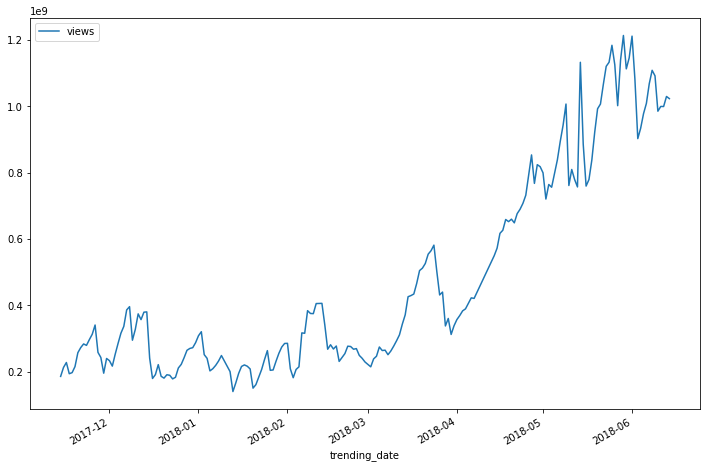

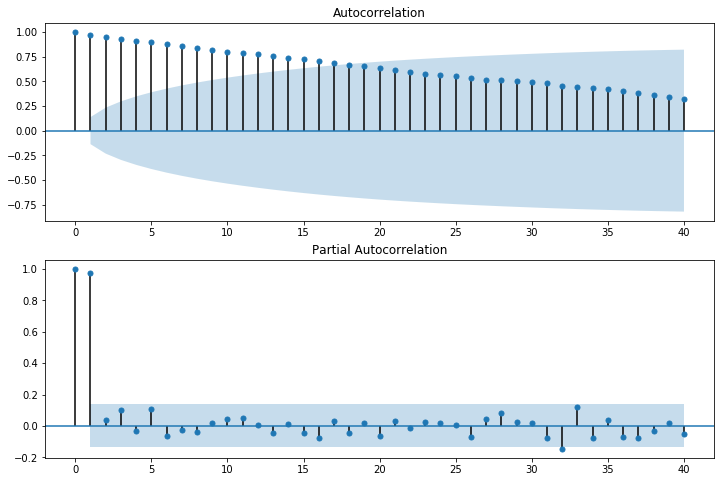

In [14]:
dta = youtube_views2


dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()